# Normalization and batch correction

## Settings

#Path related settings (these should be the same as for the previous notebook)
output_dir = '/home/rstudio/processed_data'
test = 'cropped_146'

In [12]:
# Path related settings (these should be the same as for the previous notebook)
output_dir = '/home/rstudio/processed_data'
test = 'cropped_146'

In [26]:
# choose normalization method. If None, two normalization methods will be 
# performed and visualized with pca plot
norm_method=None  # can be 'tfidf' or 'total'
log_normalize=True

# Options for highly variable genes
min_limit = 1000
max_limit = 5000

# batch correction: If True, several batch correction methods will be performed,
# you can choose the best one after
batch_correction=False

# save figures
save_figs = False

## Loading packages and setup

In [14]:
# sctoolbox modules
import sctoolbox.atac_tree as sub_tree
import sctoolbox.creators as cr
import sctoolbox.annotation as an
from sctoolbox.qc_filter import *
from sctoolbox.plotting import *
from sctoolbox.plotting_atac import *
from sctoolbox.atac_filter import *
from sctoolbox.analyser import *
# import episcanpy
import scanpy as sc
import episcanpy as epi
#from episcanpy.preprocessing import _decomposition
import numpy as np

## Setup path handling object 

In [15]:
# make an instance of the class
tree = sub_tree.ATAC_tree()
# set processing/output directory
tree.processing_dir = output_dir
# set sample/experiment.. 
tree.run = test

all directories existing
all directories existing


## Load anndata 

In [16]:
# probably updated in future
qc_output = tree.qc_anndata  # path to qc_adata should be here
adata = epi.read_h5ad(qc_output)
adata

AnnData object with n_obs × n_vars = 243 × 3746
    obs: 'TN', 'UM', 'PP', 'UQ', 'CM', 'file', 'sample', 'insertsize_count', 'mean_insertsize', 'n_total_fragments', 'n_fragments_in_promoters', 'pct_fragments_in_promoters', 'nb_features', 'log_nb_features'
    var: 'name', 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'color_set', 'infoprocess', 'insertsize_distribution', 'legend'
    layers: 'binary'

## Normalization

In [17]:
# Consider using parts of sctoolbox.analyser

In [18]:
if norm_method == 'tfidf':
    epi.pp.tfidf(adata, norm='l1', layer_tfidf_key='tf-idf')
if norm_method == 'total':
    sc.pp.normalize_total(adata)
    adata.layers['normalised'] = adata.X.copy()
#if not norm_method:
#    atac_norm(adata)  #a function that performs both norm methods and pca for each method, then plots so the user can choose

In [19]:
if log_normalize:
    epi.pp.log1p(adata)

## Find highly variable genes

In [20]:
an.annot_HVG(adata, hvg_range=(min_limit, max_limit))

Annotating highy variable genes (HVG)


In [ ]:
sc.pl.highly_variable_genes(adata, show=False)
utils.save_figure(figure_path + "highly_variable.pdf")

In [ ]:
#Number of variable genes selected
adata.var["highly_variable"].sum()

## PCA

In [21]:
compute_PCA(adata, use_highly_variable=True, inplace=False)

Computing PCA


AnnData object with n_obs × n_vars = 243 × 3746
    obs: 'TN', 'UM', 'PP', 'UQ', 'CM', 'file', 'sample', 'insertsize_count', 'mean_insertsize', 'n_total_fragments', 'n_fragments_in_promoters', 'pct_fragments_in_promoters', 'nb_features', 'log_nb_features'
    var: 'name', 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'color_set', 'infoprocess', 'insertsize_distribution', 'legend', 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'binary'

## Calc Neighbours

In [22]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50, method='umap', metric='euclidean')

         Falling back to preprocessing with `sc.pp.pca` and default params.


KeyError: 'PCs'

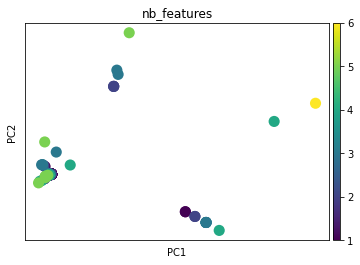

In [27]:
# Change to module
if save_figs:
    epi.pl.pca_overview(adata, color=['nb_features'], show=False)
    #plt.savefig(f'{OUTPUT_FIGS}/pca_nb_features.png')
    plt.show()
else:
    epi.pl.pca_overview(adata, color=['nb_features'])

## UMAP

Computing UMAPs:   0%|          | 0/8 [00:00<?, ?it/s]

Plotting umap for spread=2.0 and dist=0.1 (1/8)


KeyError: 'Could not find key Sample in .var_names or .obs.columns.'

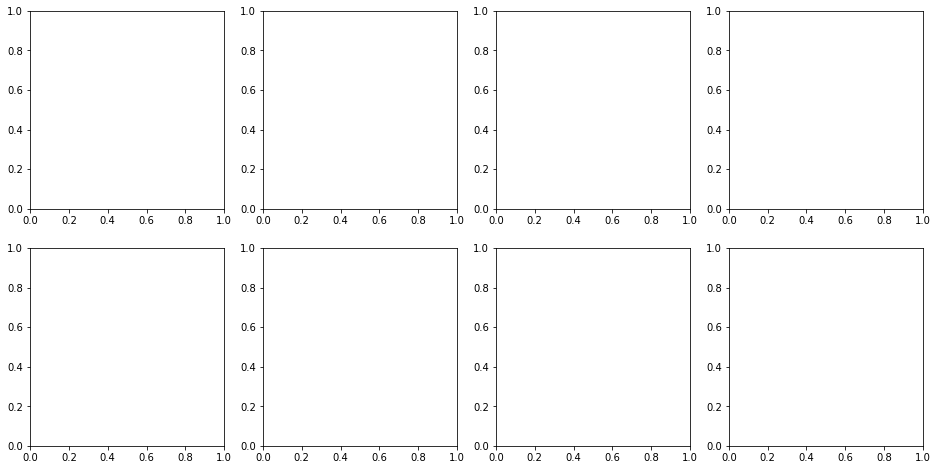

In [28]:
search_umap_parameters(adata, 
                       dist_range=(0.1, 0.4, 0.1), 
                       spread_range=(2.0, 3.0, 0.5), 
                       metacol='Sample', 
                       n_components=2, 
                       verbose=True, 
                       threads=4, 
                       save=None)

## Plot

## Batch correction

In [ ]:
#Consider 

## save anndata